# A dead simple demo of zeroshot
This demo reads an image from a URL, and runs a zeroshot model on it.

In [ ]:
# Install dependencies.
!pip install zeroshot

# The URL of our dog:
dog_url = "https://raw.githubusercontent.com/srirammanikumar/DogBreedClassifier/master/images/Labrador_retriever_06457.jpg"

# Visualize the inputs

We'll use an existing model trained to distinguish dog, cat, human, and other random zoo animals. Here is our input image:

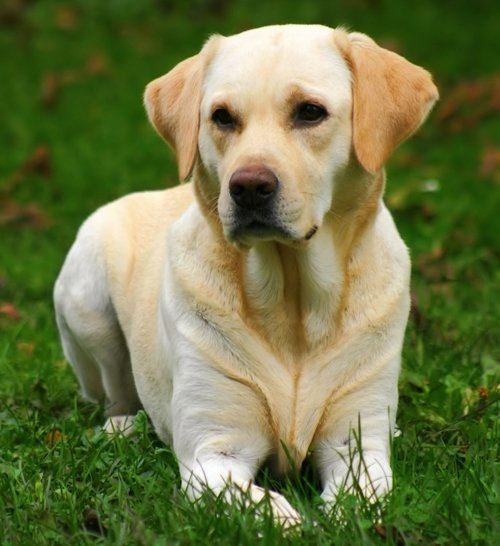


## Run the model
Next, just run the model! You'll need to go build a model at usezeroshot.com, and you can either download the file or just point at the GUID we provide. Here we'll just use an existing model that classifies a few existing objects.

In [ ]:
import zeroshot

# Create the classifier with the model we've created on usezeroshot.com
classifier = zeroshot.Classifier("d2570afb-2be7-4798-8931-ed62a5340fff")

# Run the model!
prediction = classifier.predict(dog_url)
class_name = classifier.class_list[prediction]
print(f'The image is class "{class_name}"')

## Advanced: Show probabilities of the model
At the most basic, the model will return the most likely class. However, we can ask for probabilities to instead see how confident the model is on the various classes.

In [ ]:
import zeroshot

# You can pull out the pre-processing function. This is useful in case your
# images are already in a ImageNet standardized format or something similar.
preprocess_fn = zeroshot.create_preprocess_fn()

# Create the classifier and preprocessing function.
classifier = zeroshot.Classifier(
    "d2570afb-2be7-4798-8931-ed62a5340fff", preprocessor=None
)

# Get predictions.
image = zeroshot.numpy_from_url(dog_url)
prediction = classifier.predict_proba(preprocess_fn(image))
classes = classifier.class_list

print("Probabilities:")
for pred, cls in zip(prediction, classes):
    print(f"\t{cls}: {pred:.2%}")